In [69]:
import wrds
import pandas as pd
import numpy as np
import os
import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Get the current working directory
script_dir = os.getcwd()

# Set the working directory to the current script's directory (which in this case is already the working directory)
os.chdir(script_dir)

print(f"Working directory is set to: {script_dir}")

overleaf_dir = "/Users/zrsong/Dropbox (MIT)/Apps/Overleaf/M&A Debt"

Working directory is set to: /Users/zrsong/MIT Dropbox/Zirui Song/Research Projects/MPS_Interest Deductibility and Debt Contracting/4. Code


In [70]:
control = pd.read_csv("../3. Data/Raw/control_firms_section_163.csv")
treated = pd.read_csv("../3. Data/Raw/treated_firms_section_163.csv")

In [71]:
gvkey_treatment = pd.read_stata("../3. Data/Processed/ds_gvkey_treatment_assignment.dta")
# keep gvkey fyear excess_interest_30 and excess_interest_loss
gvkey_treatment = gvkey_treatment[["gvkey", "fyear", "excess_interest_30", "excess_interest_loss"]]
# keep only fyear >= 2017
gvkey_treatment = gvkey_treatment[gvkey_treatment["fyear"] >= 2017]

In [72]:
# drop text columns
#control = control.drop(columns=['text'])
#treated = treated.drop(columns=['text'])

# concat control and treated and add a column to indicate the group
control['group'] = 'control'
treated['group'] = 'treated'

data = pd.concat([control, treated])

# change FDATE to datetime (FDATE == 20240319 -> 2024/03/19)
data['FDATE'] = pd.to_datetime(data['FDATE'], format='%Y%m%d')
data['fyear'] = data['FDATE'].dt.year

# merge loss_firms to data
data = pd.merge(data, gvkey_treatment, how='inner', on=['gvkey', 'fyear'])

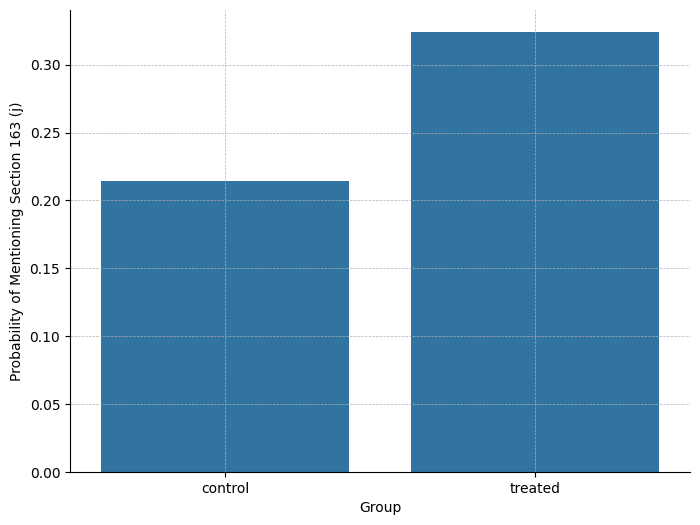

In [73]:
# Calculate the average of section_163 for control and treated groups
avg_section_163 = data.groupby('group')['section_163'].mean().reset_index()

# Plot the average of section_163 for control and treated groups
plt.figure(figsize=(8, 6))
sns.barplot(x='group', y='section_163', data=avg_section_163)
plt.xlabel('Group')
plt.ylabel('Probability of Mentioning Section 163 (j)')
plt.grid(True, linestyle='--', linewidth=0.5)
sns.despine()
# save to overleaf
plt.savefig(os.path.join(overleaf_dir, "Figures/section_163.png"))
plt.show()


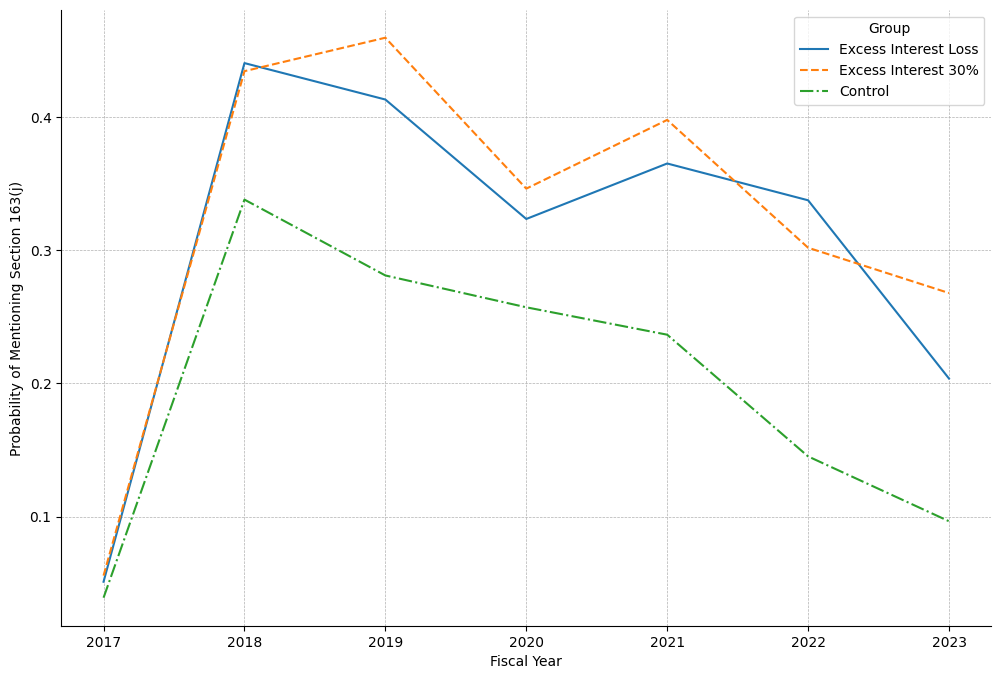

In [74]:
# Filter the data for each group
excess_interest_loss_group = data[data['excess_interest_loss'] == 1]
excess_interest_30_group = data[data['excess_interest_30'] == 1]
neither_group = data[(data['excess_interest_loss'] == 0) & (data['excess_interest_30'] == 0)]

# Calculate the average of section_163 for each group by fyear
avg_section_163_loss = excess_interest_loss_group.groupby(['fyear'])['section_163'].mean().reset_index()
avg_section_163_30 = excess_interest_30_group.groupby(['fyear'])['section_163'].mean().reset_index()
avg_section_163_neither = neither_group.groupby(['fyear'])['section_163'].mean().reset_index()

# Plot the time series for each group
plt.figure(figsize=(12, 8))

sns.lineplot(x='fyear', y='section_163', data=avg_section_163_loss, linestyle='-', label='Excess Interest Loss')
sns.lineplot(x='fyear', y='section_163', data=avg_section_163_30, linestyle='--', label='Excess Interest 30%')
sns.lineplot(x='fyear', y='section_163', data=avg_section_163_neither, linestyle='-.', label='Control')
plt.xlabel('Fiscal Year')
plt.ylabel('Probability of Mentioning Section 163(j)')
plt.legend(title='Group')
plt.grid(True, linestyle='--', linewidth=0.5)
sns.despine()
# save to overleaf
plt.savefig(os.path.join(overleaf_dir, "Figures/section_163_2017to2023.png"), dpi=300)
plt.show()